In [1]:
import pandas as pd 


In [2]:
df = pd.read_csv("RecommendationDataSetFinal1.csv")
X=df[['Humid','Temperature','Soil_Moisture','Soil_Temperature','Precipitation']]
y = df[["Seed_Name"]]


In [3]:
X

,Humid,Temperature,Soil_Moisture,Soil_Temperature,Precipitation
0,70.0,22.5,0.25,18.0,3.5
1,60.0,18.0,0.30,15.0,10.0
2,60.0,22.0,0.30,18.0,5.0
3,60.0,22.0,0.30,18.0,5.0
4,70.0,18.0,0.30,22.0,5.0
...,...,...,...,...,...
8124,60.0,22.5,0.25,18.3,5.7
8125,50.0,20.0,0.30,15.0,5.0
8126,65.0,22.5,0.25,20.0,5.0
8127,60.0,20.0,0.30,18.0,5.0


In [4]:
import numpy as np
X = np.array(X)
X

array([[70.  , 22.5 ,  0.25, 18.  ,  3.5 ],
       [60.  , 18.  ,  0.3 , 15.  , 10.  ],
       [60.  , 22.  ,  0.3 , 18.  ,  5.  ],
       ...,
       [65.  , 22.5 ,  0.25, 20.  ,  5.  ],
       [60.  , 20.  ,  0.3 , 18.  ,  5.  ],
       [60.  , 25.  ,  0.3 , 20.  ,  5.  ]])

In [5]:
import random
import numpy as np

In [8]:
import numpy as np
import random

class KMeansCluster:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None
    
    def fit(self, X):
        np.random.seed(42)  # Ensure reproducibility 
        
        # Randomly initialize centroids
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]
        # print(X[initial_indices])
        
        for _ in range(100):
            clusters = self.assign_cluster(X)
            old_centroids = self.centroids.copy()
            self.centroids = self.move_centroids(X, clusters)
            
            # Check for convergence
            if np.all(np.linalg.norm(old_centroids - self.centroids, axis=1) < 1e-6):
                break
        
        return clusters
    
    def move_centroids(self, X, clusters):
    # Initialize centroids array for new centroids
        centroids = np.zeros((self.n_clusters, X.shape[1]))

        for centroid_index in range(self.n_clusters):
            # Get the points belonging to the current centroid
            points_in_cluster = X[clusters == centroid_index]
            
            if len(points_in_cluster) > 0:
                # Calculate the mean of the distances of points in the cluster to the centroid
                centroid = np.mean(points_in_cluster, axis=0)
                centroids[centroid_index] = centroid

        return centroids


    def assign_cluster(self, X):
        all_min_indices = []  # List to store indices of nearest centroids for each point
        
        for row in X:
            distances = np.linalg.norm(self.centroids - row, axis=1)
            sorted_indices = np.argsort(distances)
            min_5_indices = sorted_indices[:5]  # Indices of the 5 nearest centroids
            all_min_indices.append(min_5_indices)
        
        return np.array(all_min_indices)


model = KMeansCluster(n_clusters=25)  # Adjust n_clusters to fit your needs
clusters = model.fit(X)

# Print first 5 nearest centroid indices for the first sample
print("Indices of 5 nearest centroids for each point:")
print(clusters[:5])


Indices of 5 nearest centroids for each point:
[[22 20 19 17 15]
 [22 20 19 17 15]
 [22 20 19 17 15]
 [22 20 19 17 15]
 [22 20 19 17 15]]


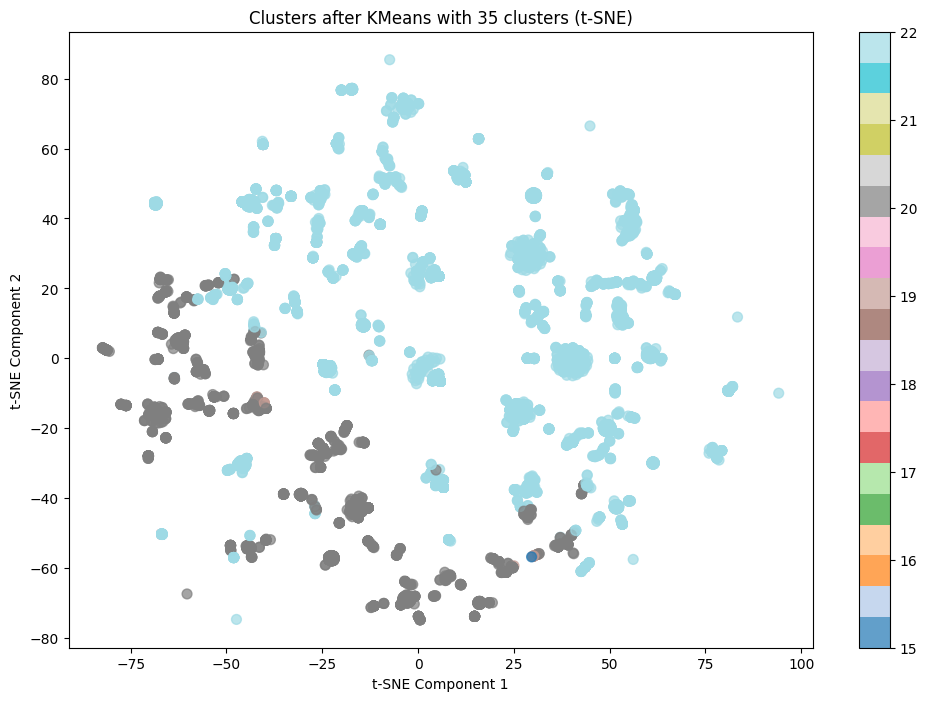

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters[:,0], cmap='tab20', s=50, alpha=0.7)
plt.colorbar()
plt.title('Clusters after KMeans with 35 clusters (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [14]:
from sklearn.metrics import silhouette_score
# The silhouette score ranges from -1 to 1, where higher values indicate better cluster separatio
# Calculate the silhouette score
silhouette_avg = silhouette_score(X,clusters)
print(f'Silhouette Score: {silhouette_avg}')


ValueError: y should be a 1d array, got an array of shape (8129, 4) instead.